In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sb
import math
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('bike_train.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     11999 non-null  int64  
 1   dteday      11999 non-null  object 
 2   season      11999 non-null  int64  
 3   yr          11999 non-null  int64  
 4   mnth        11999 non-null  int64  
 5   hr          11999 non-null  int64  
 6   holiday     11999 non-null  int64  
 7   weekday     11999 non-null  int64  
 8   workingday  11999 non-null  int64  
 9   weathersit  11999 non-null  int64  
 10  temp        11999 non-null  float64
 11  atemp       11999 non-null  float64
 12  hum         11999 non-null  float64
 13  windspeed   11999 non-null  float64
 14  casual      11999 non-null  int64  
 15  registered  11999 non-null  int64  
 16  cnt         11999 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.6+ MB


In [41]:
feature_cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X = df.loc[:, feature_cols]

In [43]:
y = df['cnt']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0) 

In [45]:
xgbr = XGBRegressor()
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [46]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

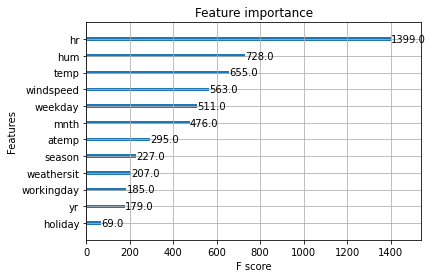

In [47]:
xgb.plot_importance(xgbr, ax = plt.gca())

In [48]:
predictions = xgbr.predict(X_test)

In [49]:
predictions[0:10]

array([125.56248  ,  35.76439  ,   7.528962 ,  51.865383 , 696.11914  ,
        68.670296 , 319.25174  , 575.3483   , 193.84055  ,   3.4361544],
      dtype=float32)

In [50]:
X_test.iloc[0]

season        3.0000
yr            0.0000
mnth          7.0000
hr            8.0000
holiday       0.0000
weekday       6.0000
workingday    0.0000
weathersit    1.0000
temp          0.7800
atemp         0.7424
hum           0.5900
windspeed     0.2239
Name: 4954, dtype: float64

In [52]:
y_test.iloc[0]

114

In [53]:
pred_train =xgbr.predict(X_train)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
print(r2_score(y_train,pred_train))

0.978960590470245


In [56]:
print(mean_squared_error(y_train,pred_train))

480.33131395635826


In [57]:
xgbr.score(X_test,y_test)

0.9456747374086383

In [58]:
print(mean_squared_error(y_test,predictions))

1263.9329083770738


In [59]:
df1 = pd.read_csv('bike_test.csv')

In [60]:
X1 = df1.loc[:, feature_cols]

In [61]:
test = xgbr.predict(X1)

In [64]:
test

array([ 14.042509,  29.756645,  41.40811 , ..., 109.59465 ,  60.042805,
         2.570695], dtype=float32)

In [62]:
lista = test.tolist()

In [63]:
lista

[14.042509078979492,
 29.75664520263672,
 41.408111572265625,
 178.57623291015625,
 203.6548309326172,
 290.8299865722656,
 464.40020751953125,
 550.2890625,
 555.0952758789062,
 596.0133666992188,
 603.5100708007812,
 559.1201171875,
 564.70556640625,
 508.06005859375,
 487.0726318359375,
 353.00372314453125,
 271.5901794433594,
 182.56114196777344,
 164.98712158203125,
 51.69569778442383,
 8.048752784729004,
 -6.4500346183776855,
 -15.756556510925293,
 -16.18921661376953,
 -14.179368019104004,
 -1.8157172203063965,
 71.79721069335938,
 105.2020034790039,
 259.57769775390625,
 173.3522186279297,
 47.31517791748047,
 169.83914184570312,
 185.59234619140625,
 107.16990661621094,
 118.82276916503906,
 273.5275573730469,
 381.92132568359375,
 737.4522094726562,
 747.887451171875,
 516.4085083007812,
 333.8627624511719,
 260.4593811035156,
 138.95074462890625,
 93.95611572265625,
 26.144243240356445,
 16.975399017333984,
 7.537811279296875,
 6.922065734863281,
 7.542143821716309,
 6.020554